In [1]:
# for clustering
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, complete
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer 

# data
import pandas as pd
import numpy as np
import os
import json

# viz
import matplotlib.pyplot as plt
%matplotlib inline

# other
from tqdm import tqdm
from copy import deepcopy
import time

MAX_TITLE_LEN = 70

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Devdatta
[nltk_data]     Supnekar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df = pd.read_csv("bbc-text.csv")
# df = pd.read_csv("1st_Input_df_for_tm.csv")
# df.rename(columns = {"Text":"text"}, inplace=True)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [19]:
stemmer = nltk.stem.snowball.SnowballStemmer("english")
lemmatizer = WordNetLemmatizer() 
translator = str.maketrans('', '', "!?;(),[]")

def tokenize_and_lemmatize_and_stem(text):
    text = text.translate(translator)
    tokens = [stemmer.stem(lemmatizer.lemmatize(word.lower())) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return tokens

def tokenize(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return tokens

In [27]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3,4), max_df=0.9, min_df=0.005, sublinear_tf=True, tokenizer=tokenize_and_lemmatize_and_stem)
data = df

tfidf_matrix = tfidf_vectorizer.fit_transform(data.text[:100])
dist = 1 - cosine_similarity(tfidf_matrix)
dist = dist - dist.min() 
linkage_matrix = ward(dist) 

C:\Anaconda\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


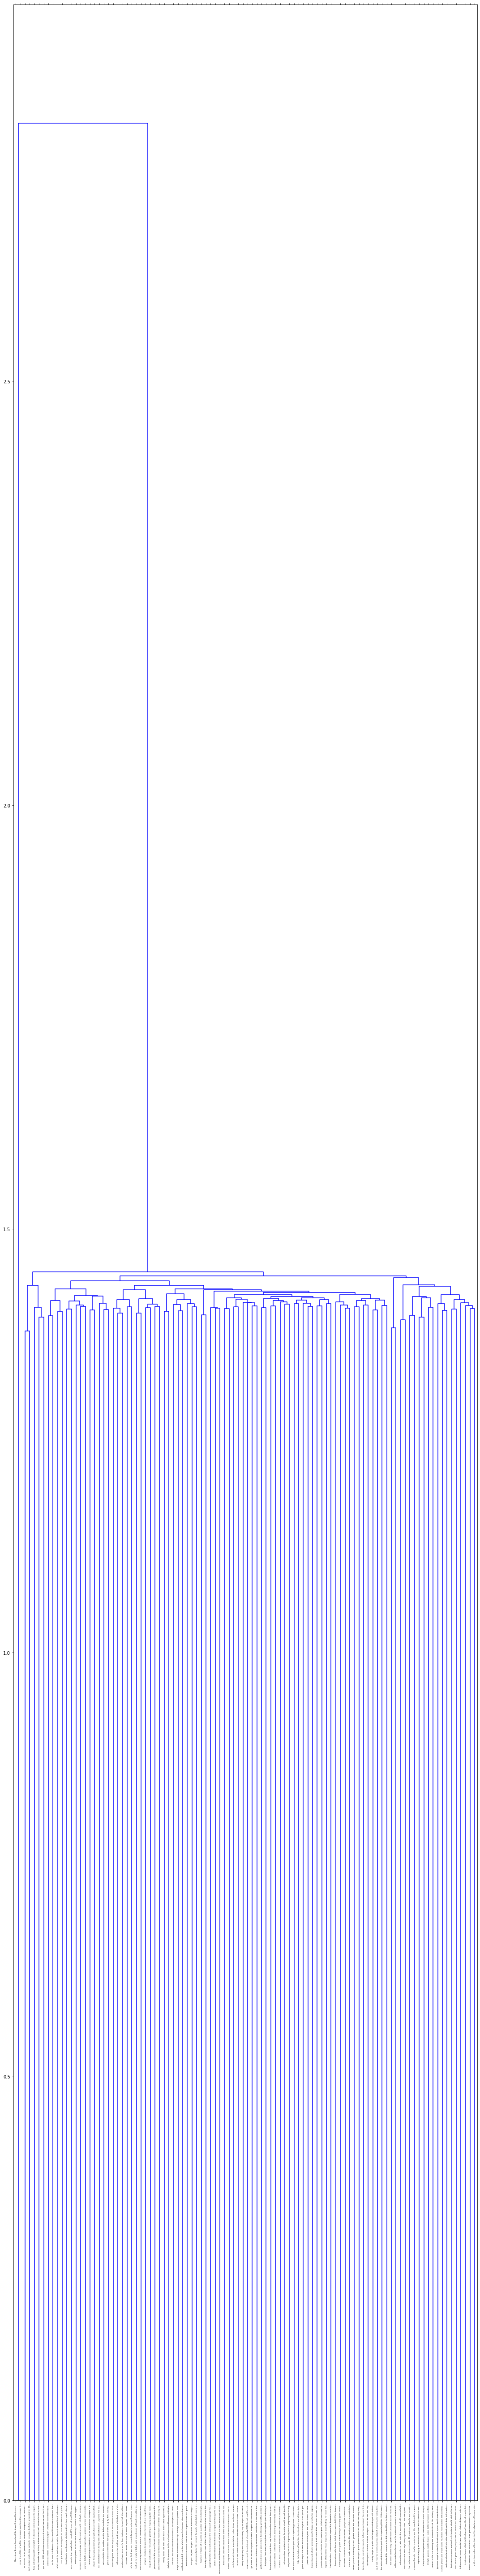

In [28]:
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.39 # max distance between points to be considered together. can be tuned.

fig, ax = plt.subplots(figsize=(15, 80)) # set size
ax = dendrogram(linkage_matrix, orientation="top", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4,
                labels=data.text.apply(lambda x: x if len(x) < MAX_TITLE_LEN else x[:MAX_TITLE_LEN  - 3] + "...").tolist())

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() 
plt.savefig('ward_clusters_all.png', dpi=300)

In [25]:
dendrogram?

In [29]:
linkage_matrix

array([[ 13.        ,  85.        ,   0.        ,   2.        ],
       [ 42.        ,  89.        ,   1.37961777,   2.        ],
       [ 74.        ,  82.        ,   1.38339332,   2.        ],
       [ 34.        ,  80.        ,   1.39288838,   2.        ],
       [ 39.        ,  71.        ,   1.39590481,   2.        ],
       [ 12.        ,  96.        ,   1.3960053 ,   2.        ],
       [ 25.        ,  41.        ,   1.39769726,   2.        ],
       [ 76.        ,  79.        ,   1.3982038 ,   2.        ],
       [ 77.        ,  81.        ,   1.39861598,   2.        ],
       [  9.        ,  50.        ,   1.40078819,   2.        ],
       [  6.        ,  32.        ,   1.40086371,   2.        ],
       [  4.        ,  31.        ,   1.40276246,   2.        ],
       [  7.        ,  95.        ,   1.40284334,   2.        ],
       [ 16.        ,  47.        ,   1.40353843,   2.        ],
       [ 18.        ,  20.        ,   1.40405916,   2.        ],
       [ 22.        ,  24

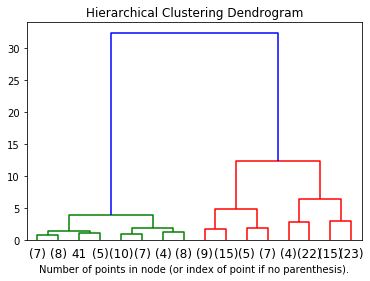

In [39]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [35]:
dendrogram?